In [1]:
#import ....
import pandas as pd
import numpy as np

# for plotting later on
import matplotlib.pyplot as plt

food =  pd.read_csv("food_nutrient_2011_13_AHS.csv", header=0,low_memory=False)

In [2]:
lga = pd.read_csv("Datasheet_external - XLSX.csv", header=0, low_memory=False)

In [3]:
lga.shape

(101, 390)

In [4]:
#Question 1

print("***")
print("Q1")

num_foods = food.shape[0]
num_attributes = food.shape[-1]
print(f"Number of foods: {num_foods}")
print(f"Number of attributes: {num_attributes}\n")
print(food.dtypes)
print("***")


***
Q1
Number of foods: 5740
Number of attributes: 57

Food ID                                                object
Survey ID                                               int64
Food Name                                              object
Survey flag                                            object
Energy, with dietary fibre (kJ)                         int64
Energy, without dietary fibre (kJ)                      int64
Moisture (g)                                          float64
Protein (g)                                           float64
Total fat (g)                                         float64
Available carbohydrates, with sugar alcohols (g)      float64
Available carbohydrates, without sugar alcohol (g)    float64
Starch (g)                                            float64
Total sugars (g)                                      float64
Added sugars (g)                                      float64
Free sugars (g)                                       float64
Dietary fibre (

In [5]:
#Question 2
print("***")
print("Q2")

med_magnesium = food['Magnesium (Mg) (mg)'].median()
mean_moisture = food['Moisture (g)'].mean()

print(f"Median value of Magnesium: {round(med_magnesium, 1)}")
print(f"Mean value of Moisture: {round(mean_moisture, 1)}")

print("***")


***
Q2
Median value of Magnesium: 22.0
Mean value of Moisture: 56.3
***


In [6]:
#Question 3
print("***")
print("Q3")

# Part a #######################################################################################

# change the type of items in the 'Survey ID' column to 'str'.
food['Survey ID'] = food['Survey ID'].astype(str)

# Part b #######################################################################################

# create a list of first two digits of each item in 'Survey ID' column.
food_kind = [digit[:2] for digit in food['Survey ID']]

# append the list above into the dataframe 'food' as a column attribute.
food['Food category'] = pd.Series(food_kind, index=food.index)

# change data type to integer for the newly appended attribute.
food['Food category'] = food['Food category'].astype('int64')

# Part c #######################################################################################

num_cereal_based = 0.0
cereal_based = 13

# increment the number of cereal based items each time an item in food category has value 13.
for item in food['Food category']:
    if item == cereal_based:
        num_cereal_based += 1.0
percent_cereal = (num_cereal_based / num_foods) * 100
print(f"% of foods which are Cereal based products and dishes (Food category 13) = {round(percent_cereal, 1)}")
print("***")


***
Q3
% of foods which are Cereal based products and dishes (Food category 13) = 15.9
***


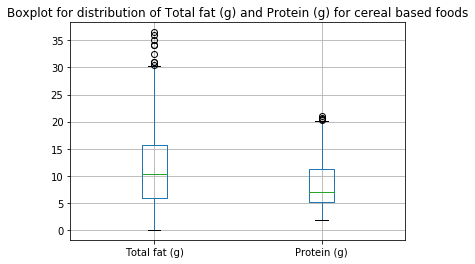

In [7]:
#Question 4

# create a dataframe so that the 'Total fat (g)' and 'Protein (g)' are retrieved only for cereal based foods.
fat_protein_cereal = food.loc[food['Food category'] == 
                              cereal_based, ['Total fat (g)', 'Protein (g)']]

boxplot1 = fat_protein_cereal.boxplot(column=['Total fat (g)', 'Protein (g)'])
plt.title("Boxplot for distribution of Total fat (g) and Protein (g) for cereal based foods")
plt.show()



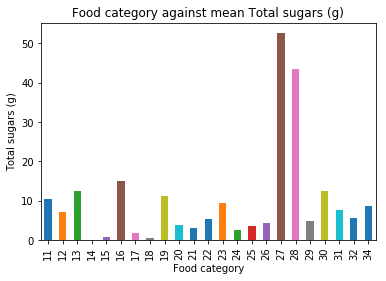

In [8]:
#Question 5

# create a dataframe that has the mean 'Total sugars (g)' grouped by 'Food category'.
mean_sugar = food.groupby('Food category')['Total sugars (g)'].mean()
mean_sugar.plot(x='Food category', y='Total sugars (g)', kind='bar', title= 'Food category against mean Total sugars (g)')
plt.ylabel('Total sugars (g)')
plt.show()


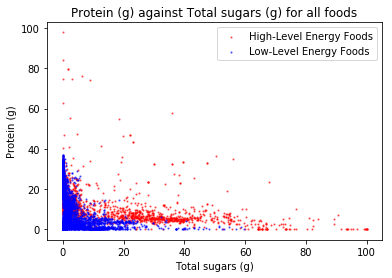

In [9]:
#Question 6

#Part a #######################################################################################

high_energy = 1
low_energy = 0
threshold_level = 1000

# make new attribute where the value is 1 or 0 according to the value of 'Energy, with dietary fibre (kJ)'.
food['EnergyLevel'] = np.where(food['Energy, with dietary fibre (kJ)']>threshold_level, high_energy, low_energy)

#Part b #######################################################################################

# Separate the high/low energy foods by using loc.
HighLevel_foods = food.loc[food['EnergyLevel'] == 1 , ['Total sugars (g)', 'Protein (g)']]
LowLevel_foods = food.loc[food['EnergyLevel'] == 0 , ['Total sugars (g)','Protein (g)']]

# plot a scatter graph for both high and low level energy foods.
plt.scatter(HighLevel_foods['Total sugars (g)'], HighLevel_foods['Protein (g)'], color = 'r', alpha=0.5, label='High-Level Energy Foods',s=1.5)
plt.scatter(LowLevel_foods['Total sugars (g)'], LowLevel_foods['Protein (g)'], color = 'b', alpha=0.5, label='Low-Level Energy Foods',s=1.5)
plt.legend()

plt.xlabel('Total sugars (g)')
plt.ylabel('Protein (g)')
plt.title('Protein (g) against Total sugars (g) for all foods')

plt.show()

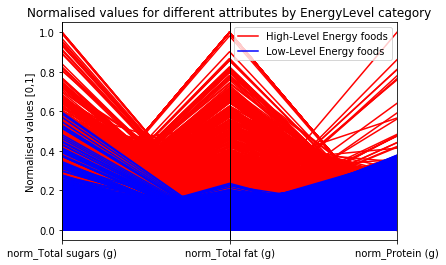

In [10]:
#Question 7

#Part a #######################################################################################

'''
define a function which returns a normalised series of the input calculated by given formula in question.
'''
def normalise (series):
    norm_col = (series-series.min())/(series.max()-series.min())
    return norm_col

# use normalise function to update attributes with new values
food['norm_Protein (g)'] = normalise(food['Protein (g)'])
food['norm_Total fat (g)'] = normalise(food['Total fat (g)'])
food['norm_Total sugars (g)'] = normalise(food['Total sugars (g)'])

#Part b #######################################################################################

HighLevel_foods = food.loc[food['EnergyLevel'] == 1 , ['norm_Total sugars (g)','norm_Total fat (g)', 'norm_Protein (g)']]
LowLevel_foods = food.loc[food['EnergyLevel'] == 0 , ['norm_Total sugars (g)','norm_Total fat (g)', 'norm_Protein (g)']]

# append new attribute column to dataframes created before. Have the type of energy level as values.
HighLevel_foods['EnergyType'] = 'High-Level Energy foods'
LowLevel_foods['EnergyType'] = 'Low-Level Energy foods'

# create parallel coordinates one by one for each type of energy level, so we can easily have legend.
plt.figure()
pd.plotting.parallel_coordinates(HighLevel_foods[['norm_Total sugars (g)','norm_Total fat (g)','norm_Protein (g)', 'EnergyType']]
                                 ,'EnergyType', color='r')
pd.plotting.parallel_coordinates(LowLevel_foods[['norm_Total sugars (g)','norm_Total fat (g)','norm_Protein (g)', 'EnergyType']]
                                 ,'EnergyType', color='b')

plt.ylabel('Normalised values [0,1]')
plt.title('Normalised values for different attributes by EnergyLevel category')
plt.show() 


***
Q8

1. Fat, solid, vegetable oil based 900.8
2. Lard 900.8
3. Dripping, beef 900.8
4. Shortening, commercial, animal fat (for short pastry, pie bases, tarts and flans) 900.8
5. Ghee, clarified butter 900.3
***


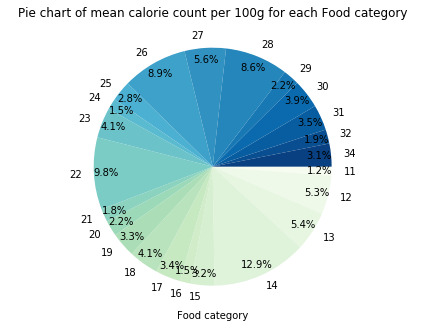

In [11]:
#Question 8


#Part a #######################################################################################

food['calorie_count_per_100g'] = 4*food['Protein (g)'] + 4*food['Available carbohydrates, with sugar alcohols (g)'] + \
                                 9*food['Total fat (g)'] + 7*food['Alcohol (g)']

#Part b #######################################################################################

print('***')
print('Q8\n')

# create a list of sorted calorie values in descending order
sorted_calorie = food['calorie_count_per_100g'].sort_values(ascending=False)
val_calorie = sorted_calorie.head().values
ind_calorie = sorted_calorie.head().index

# print out the top 5 foods with the highest calorie per 100g.
for i in range(5): 
    print(f"{i+1}. {food['Food Name'][ind_calorie[i]]} {round(val_calorie[i], 1)}")

print('***')

#Part c #######################################################################################
          
mean_calorie = food.groupby('Food category')['calorie_count_per_100g'].mean()
mean_calorie.keys()
labels = mean_calorie.keys()
sizes = mean_calorie.values

# generating different colours within a plot, 
# retrieved from:
# https://stackoverflow.com/questions/4805048/how-to-get-different-colored-lines-for-different-plots-in-a-single-figure

num_plots = len(sizes)
plt.gca().set_prop_cycle(plt.cycler('color', plt.cm.GnBu(np.linspace(0, 1, num_plots))))
          
plt.pie(sizes,labels=labels, autopct='%1.1f%%', startangle=0, counterclock=False, pctdistance=0.9)
plt.axis('equal')
plt.tight_layout()
plt.xlabel('\nFood category')
plt.title('Pie chart of mean calorie count per 100g for each Food category\n')
         
plt.show()


In [12]:
#Question 9

#Part a #######################################################################################

# read in the given csv file
category =  pd.read_csv("8i. Australian Health Survey Classification System.csv", header=0,low_memory=False)

# make empty list which will later contain Food category names.
category_name = []

# for each 2 digit Food category number, find the respective Food category name by matching Food category number with
# every Food Group Code.
i,j= (-1,-1)
for num in food['Food category']:
    j+=1
    for code in category['Food Group Code']:
        i += 1
        if num == code:
            category_name.append(category['Food Group and Sub-Group Name'][i])
           # print('num:',num,'code',code, "j:",j, food['Food Name'][j], 'is of type:',category['Food Group and Sub-Group Name'][i])
            i = -1
            break

food['Food category name'] = pd.Series(category_name, index=food.index)


#Part b #######################################################################################

# calculate mean sugar levels for each food name category
mean_sugar_by_category = food.groupby('Food category name')['Total sugars (g)'].mean()

# print output in JSON format
print('{')
print('"Mean total sugars (g) by category":','{"'+mean_sugar_by_category.keys()[0]+'":', str(round(mean_sugar_by_category.values[0],1))+',')
quotation = '"'
colon = ':'
comma = ','
for i in range(1, len(mean_sugar_by_category)-1):
    print(f"    {quotation}{mean_sugar_by_category.keys()[i]}{quotation}{colon} {round(mean_sugar_by_category.values[i], 1)}{comma}")
print('    '+quotation+mean_sugar_by_category.keys()[len(mean_sugar_by_category)-1]+'":', str(round(mean_sugar_by_category.values[len(mean_sugar_by_category)-1],1))+'}')
print('}')


{
"Mean total sugars (g) by category": {"Alcoholic beverages": 4.9,
    "Cereal based products and dishes": 12.5,
    "Cereals and cereal products": 7.1,
    "Confectionery and cereal/nut/fruit/seed bars": 43.5,
    "Dairy & meat substitutes": 3.7,
    "Egg products and dishes": 1.9,
    "Fats and oils": 0.1,
    "Fish and seafood products and dishes": 0.8,
    "Fruit products and dishes": 14.9,
    "Infant formulae and foods": 5.6,
    "Legume and pulse products and dishes": 3.7,
    "Meat, poultry and game products and dishes ": 0.5,
    "Milk products and dishes": 11.1,
    "Miscellaneous": 7.6,
    "Non-alcoholic beverages": 10.4,
    "Reptiles, amphibia and insects": 8.7,
    "Savoury sauces and condiments": 9.5,
    "Seed and nut products and dishes": 5.4,
    "Snack foods": 4.5,
    "Soup": 3.2,
    "Special dietary foods": 12.5,
    "Sugar products and dishes": 52.6,
    "Vegetable products and dishes": 2.5}
}
